In [1]:
import os
import cltk
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
lat_cltk = cltk.NLP(language='lat', suppress_banner=True)
lat_cltk.pipeline.processes.remove(cltk.lexicon.processes.LatinLexiconProcess)
# remove process since it slows the code (it adds definitions to each word)
lat_cltk.pipeline.processes.remove(cltk.embeddings.processes.LatinEmbeddingsProcess)
# remove process since it slows the code (it generates word2vec embeddings)

In [3]:
epi_path = '../../MedLatin/Corpora/MedLatinEpi'

epi_data = []
for epistle in os.listdir(epi_path):
    with open(os.path.join(epi_path, epistle), 'r', encoding='utf-8') as f:
        text = f.read()
        author, title = epistle.split('_')
        epi_data.append([author, title, text])

In [4]:
for epistle in tqdm(epi_data):
    epistle_doc = lat_cltk.analyze(epistle[-1])
    epistle.append(epistle_doc.pos)

  0%|          | 0/294 [00:00<?, ?it/s]

/home/johanneshermannpalboel/thesis/BoB-thesis/.venv/lib/python3.11/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'la_core_web_lg' (3.7.7) was trained with spaCy v3.7.5 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Unrecognized value 'Perf' for UD feature 'Tense'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the error.

Unrecognized value 'Perf' for UD feature 'Tense'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the error.

Unrecognized value 'Perf' for UD feature 'Tense'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the error.

Unrecognized value 'Perf' for UD feature 'Tense'.
If you believe this is not an error in the dependency parser, please raise an issue at <https://github.com/cltk/cltk/issues> and include a short text to reproduce the error.

Unrecognized value 'Perf' for UD feature 'Tense'.
If you believe this is not an error in the depende

In [5]:
epi_pos_bigrams = []
for epistle in epi_data:
    pos_tags = [(epistle[-1][i-1], epistle[-1][i]) for i in range(1, len(epistle[-1]))]
    epi_pos_bigrams.append(pos_tags)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [7]:
tfidf = TfidfVectorizer(ngram_range=(2,2))

In [8]:
pos_tags = [' '.join(epi[-1]) for epi in epi_data]

In [9]:
tfidf_pos_bigrams = tfidf.fit_transform(pos_tags)

In [10]:
def distance(a, b):
    return np.sqrt((np.linalg.norm(a - b)**2)/len(a))

In [11]:
distances = pairwise_distances(tfidf_pos_bigrams.toarray(), metric=distance)

<Axes: >

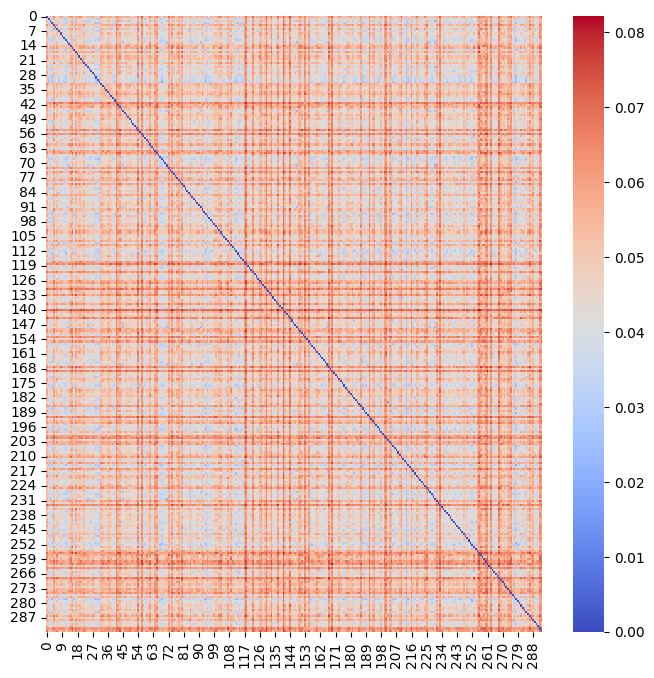

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(distances, ax=ax, cmap='coolwarm')

In [24]:
pos_tags_chunks = []
previous_i = 0
for i in np.arange(len(pos_tags)//30, len(pos_tags), len(pos_tags)//30):
    pos_tags_chunks.append(' '.join(pos_tags[previous_i:i]))
    previous_i = i

In [28]:
tfidf_pos_chunks_bigrams = tfidf.fit_transform(pos_tags_chunks)

In [35]:
distances = pairwise_distances(tfidf_pos_chunks_bigrams.toarray(), metric=distance)

array([[0.        , 0.58247852, 0.64314271, ..., 0.63976297, 0.66285129,
        0.53224262],
       [0.58247852, 0.        , 0.76564042, ..., 0.73840133, 0.67149706,
        0.56431844],
       [0.64314271, 0.76564042, 0.        , ..., 0.83184287, 0.78228734,
        0.7241516 ],
       ...,
       [0.63976297, 0.73840133, 0.83184287, ..., 0.        , 0.55846409,
        0.52941048],
       [0.66285129, 0.67149706, 0.78228734, ..., 0.55846409, 0.        ,
        0.55792536],
       [0.53224262, 0.56431844, 0.7241516 , ..., 0.52941048, 0.55792536,
        0.        ]])

<Axes: >

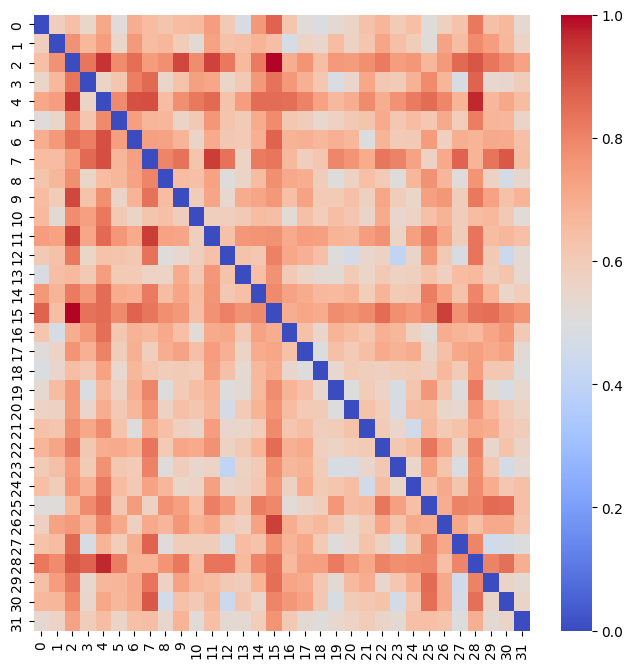

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(distances / distances.max(), ax=ax, cmap='coolwarm')